## L12 Decision Trees and Random Forests

### Setup imports

In [4]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [5]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Load data

In [6]:
digits = load_digits()

X = digits.data
y = digits.target

print(X.shape)
print(y.shape)
print(y[:15])

(1797, 64)
(1797,)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4]


### Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

print(X_train.shape) #We use 539 for training
print(X_test.shape) #We use 1258 for testing

(539, 64)
(1258, 64)


### Define the model

In [8]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

dt_classifier = DecisionTreeClassifier(
    random_state=42,
    criterion='entropy'
    )



### Train the model

In [9]:
dt_classifier.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curr

### Evaluate the model

In [10]:
y_pred = dt_classifier.predict(X_test)
y_pred_training = dt_classifier.predict(X_train)

accuracy = accuracy_score(y_test, y_pred)
accuracy_training = accuracy_score(y_train, y_pred_training)


print(f'The decision tree training set accuracy is {100 * accuracy_training}%')
print(f'The decision tree test set accuracy is {100 * accuracy}%')

#100% accuracy on the training set means we are overfitting (fix using random forest)

The decision tree training set accuracy is 100.0%
The decision tree test set accuracy is 79.25278219395867%


### Load the Random Forest model

In [11]:
max_feature_options = range(20) #Can also use an 'sqrt', 'log2', None
data = {}

for option in max_feature_options:
    #define the model
    rf_classifier = RandomForestClassifier(random_state=42, max_features=1+ option) #Since we are using range(int), we need to excluse zero

    #train the model
    rf_classifier.fit(X_train, y_train)

    #make predictions
    y_pred = rf_classifier.predict(X_test)
    y_pred_training = rf_classifier.predict(X_train)

    #determine accuracy
    y_pred_acc = accuracy_score(y_test, y_pred)
    y_pred_train_acc = accuracy_score(y_train, y_pred_training)

    #add result to 'data' dictionary
    data[option] = y_pred_acc

    #print(f'test set accuracy: {100 * y_pred_acc}%')
    #print(f'train set accuracy: {100 * y_pred_train_acc}%')

data

{0: 0.9523052464228935,
 1: 0.9491255961844197,
 2: 0.9419713831478538,
 3: 0.9507154213036566,
 4: 0.951510333863275,
 5: 0.9491255961844197,
 6: 0.9483306836248012,
 7: 0.9507154213036566,
 8: 0.9523052464228935,
 9: 0.951510333863275,
 10: 0.9523052464228935,
 11: 0.9459459459459459,
 12: 0.9507154213036566,
 13: 0.9467408585055644,
 14: 0.9483306836248012,
 15: 0.9499205087440381,
 16: 0.9491255961844197,
 17: 0.9507154213036566,
 18: 0.9491255961844197,
 19: 0.9475357710651828}

### Make plot of max features vs test set accuary

Text(0, 0.5, 'Test set accuracy')

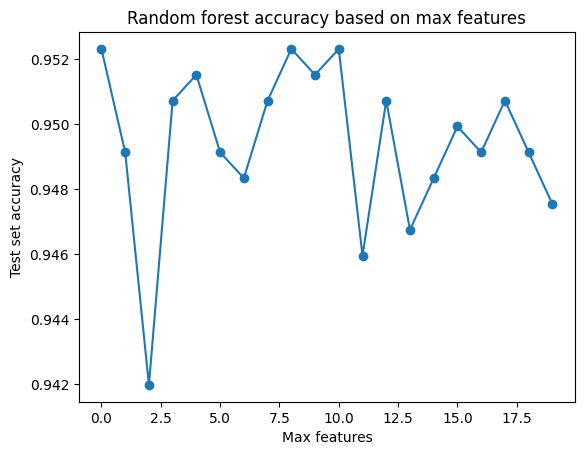

In [12]:
import matplotlib.pyplot as plt

plt.plot(max_feature_options, data.values(), marker='o')
plt.title('Random forest accuracy based on max features')
plt.xlabel('Max features')
plt.ylabel('Test set accuracy')

### Activity

Make a plot of how the number of trees (n_estimators) affects test set accuracy

Use 1, 10, 20, 30, 40, ..., 100 trees

In [13]:
n_trees = (1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100) #Can also use an 'sqrt', 'log2', None
data = {}

for option in n_trees:
    #define the model
    rf_classifier = RandomForestClassifier(random_state=42, n_estimators=option) #Since we are using range(int), we need to exclude zero

    #train the model
    rf_classifier.fit(X_train, y_train)

    #make predictions
    y_pred = rf_classifier.predict(X_test)
    y_pred_training = rf_classifier.predict(X_train)

    #determine accuracy
    y_pred_acc = accuracy_score(y_test, y_pred)
    y_pred_train_acc = accuracy_score(y_train, y_pred_training)

    #add result to 'data' dictionary
    data[option] = y_pred_acc

    #print(f'test set accuracy: {100 * y_pred_acc}%')
    #print(f'train set accuracy: {100 * y_pred_train_acc}%')

data

{1: 0.6931637519872814,
 10: 0.9133545310015898,
 20: 0.9364069952305246,
 30: 0.93879173290938,
 40: 0.9483306836248012,
 50: 0.951510333863275,
 60: 0.9475357710651828,
 70: 0.9483306836248012,
 80: 0.9499205087440381,
 90: 0.9507154213036566,
 100: 0.9507154213036566}

Text(0, 0.5, 'Test set accuracy')

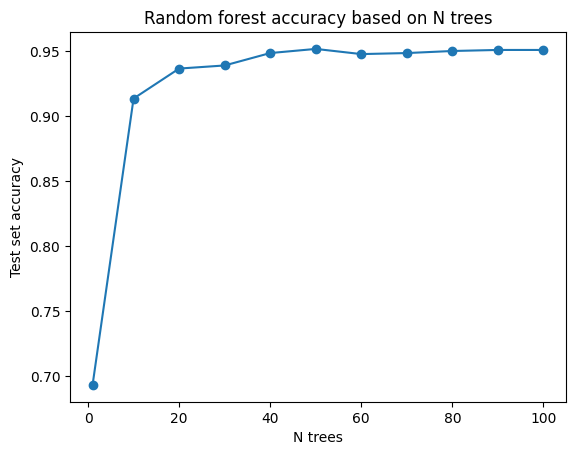

In [14]:
import matplotlib.pyplot as plt

plt.plot(n_trees, data.values(), marker='o')
plt.title('Random forest accuracy based on N trees')
plt.xlabel('N trees')
plt.ylabel('Test set accuracy')